# 개요

* 아래의 목적/이유로 참가한 스터디에 대한 기록
  * SQLD취득 후 장기 미사용 & GPT를 통한 SQL사용 등으로 많이 잊은 SQL을 복기
  * 기존에 사용해 본 Optuna가 아닌 Autogluon이 커리큘럼에 있어 익혀보고자 함
  * 기존에 관심있던 XAI(설명가능한 AI)를 익히고자 함

* 2주차 요약
  * SQL의 자료형, 함수(CAST, COALESCE 등), 서브쿼리와 CTE
  * 프로그래머스의 SQL문제풀이 과제
  * 참고 : 하단 실습코드는 head() 적용되어 있음(불필요하게 긴 포스팅 방지)

# 2주차 수업정리

## 자료형

* SQL문법마다 조금씩 다르지만, 일반적으로 아래와 같음
  * 정보가 없는 경우 : NULL
  * 문자형 : TEXT (STRING / VARCHAR)
  * 숫자형 : INT (INTEGER), REAL (FLOAT / DOUBLE)
  * 날짜/시간형 : TIMESTAMP (DATE / TIME / DATETIME / TIMESTAMP)

### 문자 자료형

* `TEXT` : **길이 제한이 없는** 문자열 변수. 로그, 리뷰 등 긴 텍스트 저장
* `CHAR` : **길이가 고정된** 문자열 변수. 전화/우편번호 등 길이가 일정한 문자열 저장
  * 길이가 부족하면 공백으로 채움
* `VARCHAR` : **길이가 가변인** 문자열 변수. **가장 일반적으로 사용**
  * 최대길이를 지정하여 사용

### 숫자 자료형

* 정수형 변수
  * `INT`: (소숫점이 없는)정수형 변수. 판매수량, 차량 대수 등 저장
    * `BIGINT` / `SMALLINT` : 자릿수에 따라 지정. 매출 등 큰 숫자를 BIGINT로 저장
      * 큰 숫자일 필요가 없다면 SMALLINT지정하여 메모리를 절약
    * INT간 연산은 INT를 반환하므로, 결과가 FLOAT 등 소수가 될 경우 유의
* 부동소수점 변수
  * `REAL`: **부동소수점**인 실수형 변수.
    * 부동소수점 : 소수점의 위치가 바뀌며, 유효숫자 X 10^지수 형태로 저장
    * 부동소수점 예시 (지수의 값에 따라 소숫점이 이동한다)
      * 1234.5 → 유효숫자 1.2345 & 지수 $10^3$
      * 1.2345 → 유효숫자 1.2345 & 지수 $10^0$
      * 1.2345e3 와 같은 형태로 나타내기도 함
    * 일반적으로 REAL은 7자리 정도의 유효숫자를 가짐
  * `DOUBLE` : `REAL`보다 약 2배인 15자리 정도의 유효숫자를 가지는 실수형 변수
  * `FLOAT(p)` : (REAL, DOUBLE과 달리)정밀도를 지정할 수 있는 실수형 변수
    * FLOAT(24) : REAL과 동일 /  FLOAT(53) : DOUBLE과 동일
      * 추가검색해본 결과, p는 유효숫자수가 아니며, FLOAT(24)=REAL은 바이트 수 기준.
    * 여기까지 REAL, DOUBLE, FLOAT를 부동소수점 변수라 부릅니다.
* 고정소수점 변수
  * `DECIMAL(m, d)`: **고정소수점**인 실수형 변수.
    * 고정소수점 : 정밀도가 아니라 소수점의 위치를 고정(DECIMAL 형태의 자료형)
    * m은 유효숫자의 개수, d는 소수점 이하의 자릿수
    * DECIMAL 지정예시 : 1234.5 → DECIMAL(5,1)

* 부동소수점 vs 고정소수점 비교

  | **특징**         | **부동소수점**                                | **고정소수점**                            |
  |------------------|---------------------------------------------|-------------------------------------------|
  | **소수점 위치**  | 가변적                                      | 고정적                                    |
  | **저장 방식**    | 유효숫자와 지수를 저장                      | 정수와 소수점 위치를 기반으로 저장         |
  | **표현 가능 범위**| 매우 크거나 작은 값 표현 가능               | 표현 가능 범위 제한                       |
  | **정밀도**       | 제한적, 오차 발생 가능                      | 정밀도 100% 보장                          |
  | **연산 속도**    | 상대적으로 느림                             | 상대적으로 빠름                           |
  | **주요 사용 사례**| 과학적 계산, 통계                          | 금융, 회계, 정밀한 금액 계산             |
  | **SQL 자료형**   | REAL, FLOAT, DOUBLE                        | DECIMAL, NUMERIC                          |


### 날짜/시간 자료형

* `DATE` / `TIME` : 날짜/시간 형태 데이터 (YYYY-MM-DD 또는 HH:MM:SS 형태로 저장)
    
* `DATETIME`  / `TIMESTAMP` : 날짜+시간 형태의 자료 (YYYY-MM-DD HH:MM:SS 형태로 저장)
  * DATETIME VS TIMESTAMP
    * DATETIME은 입력값을 그대로 저장 / TIMESTAMP는 UTC(협정세계시)로 변환
    * 글로벌서비스라면 TIMESTAMP, 값을 유지하고 싶으면 DATETIME

## 자료형 변환(CAST함수)

* 일반적으로 CAST함수로 변환. `CAST(컬럼명 AS 변수형)` 형태로 사용

## 자료형 변환 실습

In [1]:
import sqlite3
import pandas as pd

# SQLite 데이터베이스 파일 연결 (db가 없으면 자동 생성)
conn = sqlite3.connect('my_database.db', timeout=30)
cursor = conn.cursor()

In [ ]:
# INT간 연산의 잘못된 예시 : c_camp_rt = campaign / (campaign + previous)
## 5행(idx 41187)의 값이 0.75가 아닌 0으로 잘못되었음
pd.read_sql('SELECT campaign / (campaign + previous) AS c_camp_rt, campaign, previous FROM tb_camp', conn).tail(5)

,c_camp_rt,campaign,previous
41183,1,1,0
41184,1,1,0
41185,1,2,0
41186,1,1,0
41187,0,3,1


In [ ]:
# CAST를 활용해 연산 정확하게 하기
## 메모리 효율을 위해, (FLOAT가 아닌)REAL 사용
## 메모리 효율을 위해, CAST 횟수를 최소화 (분모에서 합한 후 사용)
pd.read_sql('SELECT CAST(campaign AS REAL) / CAST((campaign + previous) AS REAL) AS c_camp_rt, campaign, previous FROM tb_camp', conn).tail(5)

,c_camp_rt,campaign,previous
41183,1.00,1,0
41184,1.00,1,0
41185,1.00,2,0
41186,1.00,1,0
41187,0.75,3,1


## 문자열 함수

* 사용하는 SQL에 따라 상이하나 일반적으로 아래와 같음
```sql
UPPER(col) / LOWER(col) -- 문자열을 대 / 소문자로 변환하는 함수입니다.
LENGTH(col) -- 문자열의 길이를 반환하는 함수입니다.
SUBSTRING(col, start, n) -- 문자열의 start 부터 n개의 문자를 반환하는 함수입니다.
REPLACE(문자열, 문자1, 문자2) -- 문자1을 문자2로 통째로 변환합니다.
```

### UPPER(대문자 변환), LOWER(소문자 변환), LENGTH(문자열 길이)

In [ ]:
# 초기 데이터
q = """SELECT
    job
FROM tb_cst
"""

pd.read_sql_query(q, conn).head(5)

,job
0,housemaid
1,services
2,services
3,admin.
4,services


In [ ]:
# UPPER를 통한 대문자 변환 / LENGTH를 통한 문자길이 계산
q = """SELECT
    UPPER(job) as upper_job,
    LENGTH(job) as len_job
FROM tb_cst
"""

pd.read_sql_query(q, conn).head(5)

,upper_job,len_job
0,HOUSEMAID,9
1,SERVICES,8
2,SERVICES,8
3,ADMIN.,6
4,SERVICES,8


### SUBSTR(지정한 위치부터 N개 글자 가져오기)

* 아래는 데이터의 첫 글자만 떼어내어, CHAR(1)로 저장해 메모리를 절약하는 예제

In [ ]:
# 초기 데이터(marital 컬럼의 모든 데이터의 unique값 첫 글자가 일치하지 않음)
q = """SELECT
    marital
FROM tb_cst
"""

pd.read_sql_query(q, conn)['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
q = """SELECT
    CAST(SUBSTR(marital,1,1) AS CHAR(1)) as mr_c
FROM tb_cst
"""

pd.read_sql_query(q, conn).head(10)

,mr_c
0,m
1,m
2,m
3,m
4,m
5,m
6,m
7,m
8,s
9,s


* 아래는 SUBSTR로 뒤의 2글자를 자르는 예제

In [ ]:
q = """SELECT
    marital,
    SUBSTR(marital, LENGTH(marital)-1, 2) as last2
FROM tb_cst
"""
pd.read_sql_query(q, conn).head(10)

,marital,last2
0,married,ed
1,married,ed
2,married,ed
3,married,ed
4,married,ed
5,married,ed
6,married,ed
7,married,ed
8,single,le
9,single,le


### REPLACE(단어 찾아 바꾸기)

* 아래는 다양한 곳에서 예약어로 사용되는 `.`을, 데이터에서 제거하는 예제

In [ ]:
# 초기 데이터(education 컬럼의 unique값)
pd.read_sql('select * from tb_cst', conn).job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [ ]:
# Replace적용된 데이터 (. 찾아 삭제)
q = """SELECT job, REPLACE(job, 'admin.', 'admin') AS new_job
FROM tb_cst
"""
pd.read_sql(q, conn).new_job.unique()

array(['housemaid', 'services', 'admin', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

## 문자열 함수 실습

* tb_cst에서 job이 'blue*collar'인 사람에 대해
* 하이픈 (-)을 언더바(_*로 바꾼뒤, 직업을 대문자로 바꿔서 new_job을 반환하기

In [ ]:
# 실습 답안
q = """SELECT job, UPPER(REPLACE(job, 'blue-collar', 'blue_collar')) AS new_job
FROM tb_cst
"""
pd.read_sql(q, conn).head(10)

,job,new_job
0,housemaid,HOUSEMAID
1,services,SERVICES
2,services,SERVICES
3,admin.,ADMIN.
4,services,SERVICES
5,services,SERVICES
6,admin.,ADMIN.
7,blue-collar,BLUE_COLLAR
8,technician,TECHNICIAN
9,services,SERVICES


In [ ]:
# 메모리 절약하기 : 처음 Replace부터 대문자를 적용하여 UPPER함수 미사용
q = """SELECT job, REPLACE(job, 'blue-collar', 'BLUE_COLLAR') AS new_job
FROM tb_cst
"""
pd.read_sql(q, conn).head(10)

,job,new_job
0,housemaid,housemaid
1,services,services
2,services,services
3,admin.,admin.
4,services,services
5,services,services
6,admin.,admin.
7,blue-collar,BLUE_COLLAR
8,technician,technician
9,services,services


## 숫자 함수

* 집계함수(SUM, AVG, VAR, COUNT 등)는 계산결과를 보여주지만, 이번에는 단일 숫자를 변환
* `FLOOR`(버림), `CEIL`(올림), `ROUND`(반올림)
* `ABS`(절대값), `MOD`(나눈 후 나머지), `LOG`, `LN`(자연로그), `EXP`, `SQRT` 등
  * LOG(숫자, 컬럼명)의 경우 숫자는 밑이며, 생략시 10이거나 SQL에 따라 달라짐
* 사용하는 SQL에 따라 문법은 다를 수 있음

In [ ]:
# 버림/올림/반올림
q = """SELECT
    cons_price_idx,
    FLOOR(cons_price_idx) AS fl_idx,
    CEIL(cons_price_idx) AS cl_idx,
    ROUND(cons_price_idx, 1) AS rd_idx1,
    ROUND(cons_price_idx, 2) AS rd_idx2
FROM tb_out
"""
pd.read_sql(q, conn)

,cons_price_idx,fl_idx,cl_idx,rd_idx1,rd_idx2
0,93.994,93.0,94.0,94.0,93.99
1,93.994,93.0,94.0,94.0,93.99
2,93.994,93.0,94.0,94.0,93.99
3,93.994,93.0,94.0,94.0,93.99
4,93.994,93.0,94.0,94.0,93.99
...,...,...,...,...,...
370,94.767,94.0,95.0,94.8,94.77
371,94.767,94.0,95.0,94.8,94.77
372,94.767,94.0,95.0,94.8,94.77
373,94.767,94.0,95.0,94.8,94.77


In [ ]:
# 로그, 로그2읫, e의 4승, 4의 제곱근, e의 4승의 자연로그, 4를 2로 나눈 나머지, 4의 절대값
q = """SELECT
    4,
    LOG(4),
    LOG(2,4),
    EXP(4),
    SQRT(4),
    LN(EXP(4)),
    MOD(4,2),
    ABS(4)
"""
pd.read_sql(q, conn)

,4,LOG(4),"LOG(2,4)",EXP(4),SQRT(4),LN(EXP(4)),"MOD(4,2)",ABS(4)
0,4,0.60206,2.0,54.59815,2.0,4.0,0.0,4


## 숫자 함수 실습

* tb_out 테이블의
* nr_employed 열에 대해서
* 자연로그를 씌워서 ln_nr_employed열에,
* 제곱근을 구해서 sqrt_nr_employed열에 할당해 봅시다

In [ ]:
# write your code
q = """SELECT
    LN(nr_employed) as ln_nr_employed,
    SQRT(nr_employed) as sqrt_nr_employed
FROM tb_out
"""
pd.read_sql(q, conn)

,ln_nr_employed,sqrt_nr_employed
0,8.554682,72.048595
1,8.554682,72.048595
2,8.554682,72.048595
3,8.554682,72.048595
4,8.554682,72.048595
...,...,...
370,8.509887,70.452821
371,8.509887,70.452821
372,8.509887,70.452821
373,8.509887,70.452821


## 날짜 함수

* SQL별 문법차이가 커서, 자세한 부분은 사용하기 전 공식문서를 확인
* STFRTIME 함수는 공통적으로 있는 편
  ```sql
  STRFTIME('format', col) -- 날짜 데이터를 원하는 지정한 format의 문자열로 변환해서 반환합니다.
  ```
    | 코드    | 설명                                      | 예시                   |
    |---------|-------------------------------------------|------------------------|
    | `%Y`    | 연도 (4자리)                               | 2024                  |
    | `%y`    | 연도 (2자리)                               | 24                    |
    | `%m`    | 월 (2자리)                                 | 01 (1월), 12 (12월)   |
    | `%d`    | 일 (2자리)                                 | 01 (1일), 31 (31일)   |
    | `%H`    | 시간 (24시간제, 2자리)                     | 00 (자정), 23 (23시)  |
    | `%M`    | 분 (2자리)                                 | 00, 59                |
    | `%S`    | 초 (2자리)                                 | 00, 59                |
    | `%w`    | 요일 (0: 일요일, 6: 토요일)                | 0 (일요일), 6 (토요일)|
    | `%W`    | 연중 주 번호 (0부터 시작)                  | 00, 52                |
    | `%j`    | 연중 일 번호 (1부터 시작)                  | 001 (1월 1일), 365    |
    | `%f`    | 소수점 이하 초 (마이크로초 단위, 6자리)     | 123456                |
    | `%s`    | Unix Timestamp (1970년 1월 1일부터의 초)   | 1708953600            |
    | `%z`    | UTC 오프셋 (시간대 정보)                   | +0000, -0800          |
    | `%Z`    | 시간대 이름 (예: UTC)                      | UTC                   |
    | `%%`    | `%` 문자 그대로                            | %                     |


In [ ]:
# 실습용 테이블 생성

## 테이블 생성
q = """CREATE TABLE tb_dates (
    order_id INTEGER PRIMARY KEY,
    order_date TEXT
);"""
conn.execute(q)

## 샘플데이터 입력
q = """INSERT INTO tb_dates (order_id, order_date) VALUES
(1, '2024-12-26 10:30:00'),
(2, '2024-12-25 14:20:00'),
(3, '2024-12-24 08:00:00');
"""
conn.execute(q)

In [ ]:
# STFRTIME 실습
q ="""SELECT order_id, order_date, STRFTIME('%Y', order_date) AS order_year FROM tb_dates;"""
pd.read_sql(q, conn)

,order_id,order_date,order_year
0,1,2024-12-26 10:30:00,2024
1,2,2024-12-25 14:20:00,2024
2,3,2024-12-24 08:00:00,2024


* DB별 날짜 간의 차이구하는 샘플

| **Database**   | **SQL Query**                                                                                 | **설명**                                    |
|-----------------|-----------------------------------------------------------------------------------------------|--------------------------------------------|
| **MySQL**      | `SELECT DATEDIFF('2024-12-31', '2024-12-25') AS days_difference;`                             | 두 날짜 간의 차이를 **일 단위**로 반환       |
| **Oracle**     | `SELECT TO_DATE('2024-12-31', 'YYYY-MM-DD') - TO_DATE('2024-12-25', 'YYYY-MM-DD') AS days_difference FROM dual;` | 날짜 간 차이를 **일 단위**로 반환           |
| **SQLite3**    | `SELECT JULIANDAY('2024-12-31') - JULIANDAY('2024-12-25') AS days_difference;`                 | 두 날짜의 **율리우스 날짜 차이**를 계산      |
| **Hive**       | `SELECT DATEDIFF('2024-12-31', '2024-12-25') AS days_difference;`                             | 날짜 차이를 **일 단위**로 반환               |
| **PostgreSQL** | `SELECT '2024-12-31'::DATE - '2024-12-25'::DATE AS days_difference;`                          | 두 날짜 간의 차이를 **일 단위**로 반환       |

## CASE WHEN 조건문

* CASE WHEN
```sql
CASE WHEN 조건1 THEN 결과1
    WHEN 조건2 THEN 결과2
    ...
    ELSE 모든 조건을 만족하지 않을 때의 결과 END AS 변수명
```

* 아래 표의 education(학력)은, 순위가 있는 Ordinal변수
  * 한 자리 숫자코드로 지정해 모델이 이해하기 쉽게 / 메모리효율이 높아지게 함

In [ ]:
pd.read_sql('SELECT education FROM tb_cst', conn).education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
q = """SELECT
    education,
    CASE WHEN education = 'illiterate' THEN 0
         WHEN education = 'basic.4y' THEN 1
         WHEN education = 'basic.6y' THEN 2
         WHEN education = 'basic.9y' THEN 3
         WHEN education = 'high.school' THEN 4
         WHEN education = 'university.degree' THEN 5
         WHEN education = 'professional.course' THEN 6
         WHEN education = 'unknown' THEN 99
         ELSE 99 END AS education_c
FROM tb_cst
"""
pd.read_sql(q, conn).head(10)

,education,education_c
0,basic.4y,1
1,high.school,4
2,high.school,4
3,basic.6y,2
4,high.school,4
5,basic.9y,3
6,professional.course,6
7,unknown,99
8,professional.course,6
9,high.school,4


* 학력별 고객 수를 1K 이상/이하 등으로 지정하는 예시

In [ ]:
q = """SELECT
    education,
    COUNT(*) AS n_cst,
    CASE WHEN COUNT(*) > 1000 THEN 'Above 1K'
         ELSE 'Below 1K'
         END AS n_cst_over_1k
FROM tb_cst
GROUP BY education
"""
pd.read_sql(q, conn)

,education,n_cst,n_cst_over_1k
0,basic.4y,4176,Above 1K
1,basic.6y,2292,Above 1K
2,basic.9y,6045,Above 1K
3,high.school,9515,Above 1K
4,illiterate,18,Below 1K
5,professional.course,5243,Above 1K
6,university.degree,12168,Above 1K
7,unknown,1731,Above 1K


## SQL실행순서 (+CASE WHEN 사용시 유의할 점)

* SQL실행순서
    1. FROM & JOIN
    2. WHERE
    3. GROUP BY
    4. HAVING
    5. SELECT (window function, case when)
    6. ORDER BY
    7. LIMIT
* CASE WHEN은 SELECT 안에서 실행되므로, CASE WHEN으로 생성한 변수를 쓰려면 별칭이 아닌 구문 전체를 사용
  * AS는 오류를 일으키는 경우가 많아 END까지만 작성

## CASE WHEN 실습

* 고객의 직업별로
* 확실히 파산한 고객의 수를 n_default_cst에 할당한 뒤 (Unique한 수를 세려면 DISTINCT를 열 앞에 붙여주세요. COUNT(DISTINCT COL) 이렇게요.)
* 1명 이상 있다면 1 없으면 0을 is_default_job에 할당해주세요.

In [ ]:
q = """SELECT
job, 
SUM(CASE WHEN is_default = 'yes' THEN 1
        ELSE 0
        END) AS n_default_cst,
CASE WHEN SUM(CASE WHEN is_default = 'yes' then 1
        ELSE 0
        END) >= 1 THEN 1
        ELSE 0
        END AS is_default_job
FROM tb_cst
GROUP BY job
"""
pd.read_sql(q, conn)

# 위 사항은 자주 사용되는 케이스임

,job,n_default_cst,is_default_job
0,admin.,0,0
1,blue-collar,0,0
2,entrepreneur,0,0
3,housemaid,0,0
4,management,0,0
5,retired,0,0
6,self-employed,0,0
7,services,0,0
8,student,0,0
9,technician,2,1


## JOIN과 UNION

* 서로 다른 두 테이블을 합치고 싶을 때 JOIN 사용(Python pandas의 merge와 동일)
* FROM절 다음에 사용
```sql
    SELECT
    tb1.col1_from_tb1,
    tb1.col2_from_tb1,
    tb1.join_key,
    tb2.col1_from_tb2
    FROM table1 AS tb1
    'JOIN 방법' JOIN tabl2 AS tb2
    ON tb1.join_key = tb2.join_key
        AND ...
```

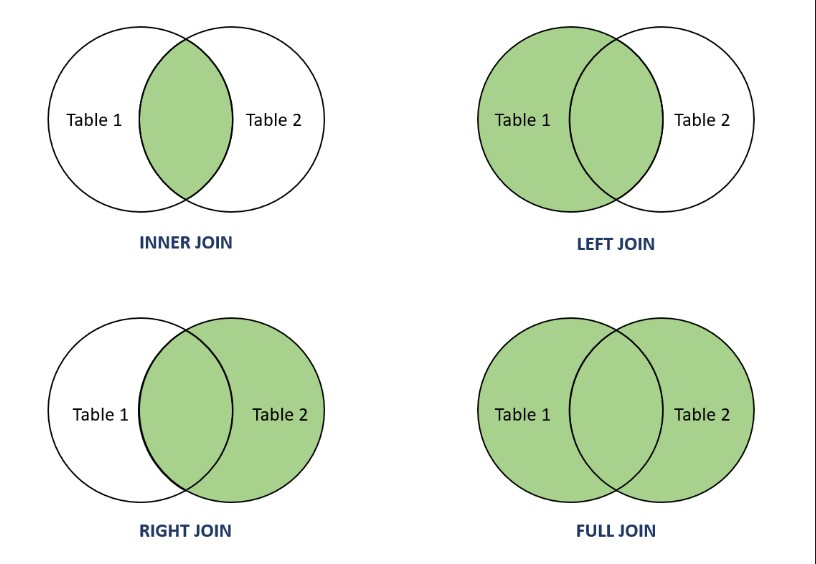

In [ ]:
# JOIN대상 테이블1
tb_cst = pd.read_sql('SELECT * FROM tb_cst', conn)
tb_cst.head(5)

,date,idx,age,job,marital,education,is_default,housing,loan
0,2023-01-01,0,56,housemaid,married,basic.4y,no,no,no
1,2023-01-01,1,57,services,married,high.school,unknown,no,no
2,2023-01-01,2,37,services,married,high.school,no,yes,no
3,2023-01-01,3,40,admin.,married,basic.6y,no,no,no
4,2023-01-01,4,56,services,married,high.school,no,no,yes


In [ ]:
# JOIN대상 테이블2
tb_camp = pd.read_sql('SELECT * FROM tb_camp', conn)
tb_camp.head(5)

,date,idx,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,2023-01-01,0,telephone,may,mon,261,1,999,0,nonexistent
1,2023-01-01,1,telephone,may,mon,149,1,999,0,nonexistent
2,2023-01-01,2,telephone,may,mon,226,1,999,0,nonexistent
3,2023-01-01,3,telephone,may,mon,151,1,999,0,nonexistent
4,2023-01-01,4,telephone,may,mon,307,1,999,0,nonexistent


In [ ]:
# JOIN대상 테이블3
tb_out = pd.read_sql('SELECT * FROM tb_out', conn)
tb_out.head(5)

,date,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,2023-01-01,1.1,93.994,-36.4,4.857,5191.0
1,2023-01-02,1.1,93.994,-36.4,4.856,5191.0
2,2023-01-03,1.1,93.994,-36.4,4.855,5191.0
3,2023-01-04,1.1,93.994,-36.4,4.859,5191.0
4,2023-01-05,1.1,93.994,-36.4,4.860,5191.0


* LEFT JOIN 예시

In [ ]:
# LEFT JOIN 예시
q = """SELECT
    c1.date, -- from절에서 가져올 열들을 별칭을 활용해 지정해 줍니다.
    c1.idx,
    c1.age,
    c1.job,
    c1.marital,
    c1.education,
    c1.is_default,
    c1.housing,
    c1.loan,
    o1.emp_var_rate, -- 마찬가지로 join절에서 가져올 열 역시 지정이 가능합니다.
    o1.cons_price_idx,
    o1.cons_conf_idx,
    o1.euribor3m,
    o1.nr_employed
FROM tb_cst AS c1
LEFT JOIN tb_out AS o1
  ON c1.date = o1.date
"""
pd.read_sql(q, conn).head(5)

,date,idx,age,job,marital,education,is_default,housing,loan,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,2023-01-01,0,56,housemaid,married,basic.4y,no,no,no,1.1,93.994,-36.4,4.857,5191.0
1,2023-01-01,1,57,services,married,high.school,unknown,no,no,1.1,93.994,-36.4,4.857,5191.0
2,2023-01-01,2,37,services,married,high.school,no,yes,no,1.1,93.994,-36.4,4.857,5191.0
3,2023-01-01,3,40,admin.,married,basic.6y,no,no,no,1.1,93.994,-36.4,4.857,5191.0
4,2023-01-01,4,56,services,married,high.school,no,no,yes,1.1,93.994,-36.4,4.857,5191.0


* INNER JOIN 예시

In [ ]:
# JOIN대상 테이블4
tb_y = pd.read_sql('SELECT * FROM tb_y', conn)
tb_y.head(5)

,date,idx,y
0,2023-01-01,0,no
1,2023-01-01,1,no
2,2023-01-01,2,no
3,2023-01-01,3,no
4,2023-01-01,5,no


In [ ]:
# INNER JOIN 예시
q = """SELECT
    c1.date, -- from절에서 가져올 열들을 별칭을 활용해 지정해 줍니다.
    c1.idx,
    c1.age,
    c1.job,
    c1.marital,
    c1.education,
    c1.is_default,
    c1.housing,
    c1.loan,
    y1.y
FROM tb_cst AS c1
INNER JOIN tb_y AS y1
  ON c1.date = y1.date
    AND c1.idx = y1.idx
"""
co = pd.read_sql(q, conn)
co.head(5)

,date,idx,age,job,marital,education,is_default,housing,loan,y
0,2023-01-01,0,56,housemaid,married,basic.4y,no,no,no,no
1,2023-01-01,1,57,services,married,high.school,unknown,no,no,no
2,2023-01-01,2,37,services,married,high.school,no,yes,no,no
3,2023-01-01,3,40,admin.,married,basic.6y,no,no,no,no
4,2023-01-01,5,45,services,married,basic.9y,unknown,no,no,no


In [ ]:
print(f"""INNER JOIN의 결과 행의 개수 : {co.shape[0]}
기존 tb_cst의 행의 개수 : {tb_cst.shape[0]}""")

INNER JOIN의 결과 행의 개수 : 37534
기존 tb_cst의 행의 개수 : 41188


## COALESCE(또는 NVL)

* NULL이 들어갈 자리에 지정한 값을 넣음
  ```sql
  COALESCE(tb1.col1, 'no') as col1
  ```
* 위에서 INNER JOIN사용시 값이 줄었는데, Y값이 없다는 것을 YES가 아닌 NO나 UNKNOWN으로 구분해 이진/다중 분류로 사용하고 싶을 때에도 활용 가능

In [ ]:
q = """SELECT
    c1.date, -- from절에서 가져올 열들을 별칭을 활용해 지정해 줍니다.
    c1.idx,
    c1.age,
    c1.job,
    c1.marital,
    c1.education,
    c1.is_default,
    c1.housing,
    c1.loan,
    COALESCE(y1.y, 'no') as y
FROM tb_cst AS c1
LEFT JOIN tb_y AS y1
  ON c1.date = y1.date
    AND c1.idx = y1.idx
"""
co2 = pd.read_sql(q, conn)
co2.head(5)

,date,idx,age,job,marital,education,is_default,housing,loan,y
0,2023-01-01,0,56,housemaid,married,basic.4y,no,no,no,no
1,2023-01-01,1,57,services,married,high.school,unknown,no,no,no
2,2023-01-01,2,37,services,married,high.school,no,yes,no,no
3,2023-01-01,3,40,admin.,married,basic.6y,no,no,no,no
4,2023-01-01,4,56,services,married,high.school,no,no,yes,no


In [ ]:
# NULL로 채워넣어 행의 수가 줄지 않음
print(f"""INNER JOIN의 결과 행의 개수 : {co2.shape[0]}
기존 tb_cst의 행의 개수 : {tb_cst.shape[0]}""")

INNER JOIN의 결과 행의 개수 : 41188
기존 tb_cst의 행의 개수 : 41188


## JOIN과 COALESE 실습

* tb_cst, tb_camp, tb_out, tb_y를 전부 JOIN해 tb_master table을 만들어 저장하세요.
* tb_cst, tb_camp, tb_y는 date, idx를 key로, tb_out은 date를 key로 갖습니다.
* tb_y가 null인 경우, 'unknown'으로 값을 채워 넣으세요.

In [3]:
conn.execute("DROP TABLE IF EXISTS tb_master")

In [4]:
q = """
CREATE TABLE tb_master AS
    SELECT
        *
        ,COALESCE(c3.y, 'unknown')
    FROM tb_cst as c1
    LEFT JOIN tb_camp as c2
        ON c1.date = c2.date AND c1.idx = c2.idx
    LEFT JOIN tb_y as c3
        ON c1.date = c3.date AND c1.idx = c3.idx
    LEFT JOIN tb_out as d1
        ON c1.date = d1.date
"""
conn.execute(q)

pd.read_sql('SELECT * FROM tb_master', conn).head(10)

,date,idx,age,job,marital,education,is_default,housing,loan,date:1,...,date:2,idx:2,y,date:3,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,"COALESCE(c3.y, 'unknown')"
0,2023-01-01,0,56,housemaid,married,basic.4y,no,no,no,2023-01-01,...,2023-01-01,0.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
1,2023-01-01,1,57,services,married,high.school,unknown,no,no,2023-01-01,...,2023-01-01,1.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
2,2023-01-01,2,37,services,married,high.school,no,yes,no,2023-01-01,...,2023-01-01,2.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
3,2023-01-01,3,40,admin.,married,basic.6y,no,no,no,2023-01-01,...,2023-01-01,3.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
4,2023-01-01,4,56,services,married,high.school,no,no,yes,2023-01-01,...,None,NaN,None,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,unknown
5,2023-01-01,5,45,services,married,basic.9y,unknown,no,no,2023-01-01,...,2023-01-01,5.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
6,2023-01-01,6,59,admin.,married,professional.course,no,no,no,2023-01-01,...,2023-01-01,6.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
7,2023-01-01,7,41,blue-collar,married,unknown,unknown,no,no,2023-01-01,...,2023-01-01,7.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
8,2023-01-01,8,24,technician,single,professional.course,no,yes,no,2023-01-01,...,2023-01-01,8.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no
9,2023-01-01,9,25,services,single,high.school,no,yes,no,2023-01-01,...,2023-01-01,9.0,no,2023-01-01,1.1,93.994,-36.4,4.857,5191.0,no


## 서브쿼리와 CTE

* 실무에서는 쿼리가 길고 많은 테이블을 가져다가 쓰게 됨
* 매번 위처럼 CREATE TABLE로 업무하면 전산팀 등에서 용량 문제로 연락올 수 있음
* 이런 문제가 발생치 않도록 할 수 있는 것이 `서브쿼리`와 `CTE`
* 서브쿼리는 사용이 편하나 가독성/재활용성이 떨어지고, CTE는 이해하기 용이함
  * 본인의 업무에 맞게 활용

### 서브쿼리

* FROM, WHERE, HAVING 등 다양한 곳에 사용할 수 있음
  * 보통 FROM, JOIN, WHERE에 많이 사용
* 장점 : 별도 테이블로 저장/삭제할 필요없이 쿼리를 적어 사용가능
* 단점 : 가독성, 재활용
* 서브쿼리 샘플 (LEFT JOIN부분)
```sql
SELECT
    c1.*,
    c2.marital_rate_per_job
FROM tb_cst AS c1
LEFT JOIN (
SELECT
    job,
    SUM(CASE WHEN marital = 'married' THEN 1.0 ELSE 0.0 END) / COUNT(*) AS marital_rate_per_job
FROM tb_cst
GROUP BY job
) AS c2 ON c1.job = c2.job
```

### CTE(Common Table Expressions)

* WITH + 임시테이블명을 지정 후, 호출하여 사용가능
```sql
WITH 임시테이블명 AS (
원래 서브쿼리에 들어가던 쿼리
)...
```

* 여러개를 지정할 경우, WITH는 한번만 쓰고 ,(쉼표)로 구분
* 적절한 테이블네이밍과 주석을 통해, 장기적 관점에서 관리/활용이 용이함
* CTE 샘플
```sql
WITH tb_marital_rate_per_job AS (
    SELECT
        job,
        SUM(CASE WHEN marital = 'married' THEN 1.0 ELSE 0.0 END) / COUNT(*) AS marital_rate_per_job
    FROM tb_cst
    GROUP BY job
    )
    SELECT
        c1.*,
        c2.marital_rate_per_job
    FROM tb_cst AS c1
    LEFT JOIN tb_marital_rate_per_job AS c2 ON c1.job = c2.job
```

## 서브쿼리와 CTE실습

- 켐페인 정보 테이블에 대해서
- contact별 평균 pdays를 구해 avg_pdays_per_contact에 할당하고 (단 999는 제외할 것)
- day_of_week별 평균 duration을 구해 avg_duration_per_dow에 할당하고
- 해당 두 컬럼을 켐페인 정보 테이블에 LEFT JOIN한 결과를 서브쿼리와 CTE 각각을 사용해 구하세요.

In [5]:
# 서브쿼리
q = """
SELECT
    *
FROM tb_camp AS main
LEFT JOIN (SELECT contact, AVG(pdays)
      FROM tb_camp
      WHERE pdays != 999
      GROUP BY contact) AS avg_pdays_per_contact
    ON main.contact = avg_pdays_per_contact.contact
LEFT JOIN (SELECT day_of_week, AVG(duration)
            FROM tb_camp
            GROUP BY day_of_week) AS avg_duration_per_dow
    ON main.day_of_week = avg_duration_per_dow.day_of_week
"""

pd.read_sql_query(q, conn).head(10)

,date,idx,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,contact,AVG(pdays),day_of_week,AVG(duration)
0,2023-01-01,0,telephone,may,mon,261,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
1,2023-01-01,1,telephone,may,mon,149,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
2,2023-01-01,2,telephone,may,mon,226,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
3,2023-01-01,3,telephone,may,mon,151,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
4,2023-01-01,4,telephone,may,mon,307,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
5,2023-01-01,5,telephone,may,mon,198,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
6,2023-01-01,6,telephone,may,mon,139,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
7,2023-01-01,7,telephone,may,mon,217,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
8,2023-01-01,8,telephone,may,mon,380,1,999,0,nonexistent,telephone,6.212389,mon,246.568358
9,2023-01-01,9,telephone,may,mon,50,1,999,0,nonexistent,telephone,6.212389,mon,246.568358


In [6]:
# CTE
q = """WITH avg_pdays_per_contact AS (
        SELECT contact, AVG(pdays) as average_pdays
      FROM tb_camp
      WHERE pdays != 999
      GROUP BY contact
      ),
avg_duration_per_dow AS (
        SELECT day_of_week, AVG(duration) as average_duration
        FROM tb_camp
        GROUP BY day_of_week
      )
SELECT
    main.*
    ,c1.average_pdays
    ,c2.average_duration
FROM tb_camp AS main
LEFT JOIN avg_pdays_per_contact AS c1
    ON main.contact = c1.contact
LEFT JOIN avg_duration_per_dow AS c2
    ON main.day_of_week = c2.day_of_week
"""

pd.read_sql_query(q, conn).head(10)

,date,idx,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,average_pdays,average_duration
0,2023-01-01,0,telephone,may,mon,261,1,999,0,nonexistent,6.212389,246.568358
1,2023-01-01,1,telephone,may,mon,149,1,999,0,nonexistent,6.212389,246.568358
2,2023-01-01,2,telephone,may,mon,226,1,999,0,nonexistent,6.212389,246.568358
3,2023-01-01,3,telephone,may,mon,151,1,999,0,nonexistent,6.212389,246.568358
4,2023-01-01,4,telephone,may,mon,307,1,999,0,nonexistent,6.212389,246.568358
5,2023-01-01,5,telephone,may,mon,198,1,999,0,nonexistent,6.212389,246.568358
6,2023-01-01,6,telephone,may,mon,139,1,999,0,nonexistent,6.212389,246.568358
7,2023-01-01,7,telephone,may,mon,217,1,999,0,nonexistent,6.212389,246.568358
8,2023-01-01,8,telephone,may,mon,380,1,999,0,nonexistent,6.212389,246.568358
9,2023-01-01,9,telephone,may,mon,50,1,999,0,nonexistent,6.212389,246.568358


## 심화 : Window함수

* Window함수는 데이터의 현재 구조를 유지하며 추가 정보를 제공하기 위해 사용
  * 앞서 서브쿼리로 했던, 집계함수 계산 후 Join했던 부분을 대체가능함
* (Sorting영향을 많이 받으므로)데이터가 엉망일수록 오히려 성능이 안좋을 수 있으나, 가독성 측면에서 이점
* Window함수의 문법
  ```sql
  집계 함수 OVER ([PARTITION BY 파티션 기준 열] [ORDER BY 정렬 기준 열])
  ```
    * 집계 함수
      * RANK, SUM, AVG, COUNT, MIN, MAX
      * ROW_NUMBER : RANK와 유사하나, 값이 같아도 행 번호는 다름
    * OVER
      * 모든 WINDOW함수와 함께 사용되는 기본 문법
    * PARTITION BY
      * 해당 열을 기준으로 데이터를 쪼개어(GROUP BY와 유사) 계산
      * 서브쿼리와 CTE에서 GROUP BY에 해당하는 열이 들어가는 자리
    * ORDER BY
      * RANK처럼 순서가 유의미한 함수를 사용할 때 사용
      * SQLITE3은 미지정시 첫 열을 기준으로 정렬

In [7]:
# Window함수 적용 전 샘플
q = """WITH tb_marital_rate_per_job AS (
  SELECT
    job,
    SUM(CASE WHEN marital = 'married' THEN 1.0 ELSE 0.0 END) / COUNT(*) AS marital_rate_per_job
  FROM tb_cst
  GROUP BY job
)
SELECT
    c1.*,
    c2.marital_rate_per_job
FROM tb_cst AS c1
LEFT JOIN tb_marital_rate_per_job AS c2 ON c1.job = c2.job
"""

tb_cte = pd.read_sql_query(q, conn)
tb_cte.head(10)

,date,idx,age,job,marital,education,is_default,housing,loan,marital_rate_per_job
0,2023-01-01,0,56,housemaid,married,basic.4y,no,no,no,0.733019
1,2023-01-01,1,57,services,married,high.school,unknown,no,no,0.577979
2,2023-01-01,2,37,services,married,high.school,no,yes,no,0.577979
3,2023-01-01,3,40,admin.,married,basic.6y,no,no,no,0.504030
4,2023-01-01,4,56,services,married,high.school,no,no,yes,0.577979
5,2023-01-01,5,45,services,married,basic.9y,unknown,no,no,0.577979
6,2023-01-01,6,59,admin.,married,professional.course,no,no,no,0.504030
7,2023-01-01,7,41,blue-collar,married,unknown,unknown,no,no,0.722606
8,2023-01-01,8,24,technician,single,professional.course,no,yes,no,0.544268
9,2023-01-01,9,25,services,single,high.school,no,yes,no,0.577979


In [8]:
# Window함수 적용 후 샘플
q = """SELECT
    *,
    SUM(CASE WHEN marital = 'married' THEN 1.0 ELSE 0.0 END) OVER(PARTITION BY job) / COUNT(*) OVER(PARTITION BY job) AS marital_rate_per_job
FROM tb_cst
"""

tb_window = pd.read_sql_query(q, conn)
tb_window.head(10)

,date,idx,age,job,marital,education,is_default,housing,loan,marital_rate_per_job
0,2023-01-01,3,40,admin.,married,basic.6y,no,no,no,0.50403
1,2023-01-01,6,59,admin.,married,professional.course,no,no,no,0.50403
2,2023-01-01,24,37,admin.,married,high.school,no,yes,no,0.50403
3,2023-01-01,30,46,admin.,married,unknown,no,no,no,0.50403
4,2023-01-01,38,41,admin.,married,university.degree,no,yes,no,0.50403
5,2023-01-01,42,38,admin.,single,professional.course,no,no,no,0.50403
6,2023-01-01,43,57,admin.,married,university.degree,no,no,yes,0.50403
7,2023-01-01,44,44,admin.,married,university.degree,unknown,yes,no,0.50403
8,2023-01-01,46,57,admin.,married,university.degree,no,yes,yes,0.50403
9,2023-01-01,48,35,admin.,married,university.degree,no,yes,no,0.50403


## 기타

* GROUPBY와 PARTITION BY의 차이 : PARTITION BY는 원래 데이터 형태를 해치치 않음
  * GROUPBY는 지정한 컬럼에 대해 값만 남겨놓고 계산(그룹핑할 데이터를 가져 옴옴)
    * 예를 들어 위의 데이터는 41188 row를 가지고있었는데, 이 row를 모두 쓰지 않음
  * PARTITION BY는 원래 데이터 형태를 해치치않고, 계산을 위한 임시Window를 활용

* 파이썬은 느린편이어서, 가능한 SQL 등으로 전처리를 하고 넘어오는 것이 좋다
  * (강사님 기준 대용량 처리) Polar(가 duckdb보다 좀 더 편했음), ductdb > 파이썬

## 과제

### 프로그래머스 과제 풀기

* 저작권 관련 [프로그래머스 링크](https://docs.channel.io/grepp_qna/ko/articles/%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%A8%B8%EC%8A%A4%EC%9D%98-%EB%AC%B8%EC%A0%9C%EB%A5%BC-%EC%99%B8%EB%B6%80%EC%97%90-%EA%B2%8C%EC%8B%9C%ED%95%A0-%EC%88%98-%EC%9E%88%EB%82%98%EC%9A%94-3f8537c9)
```
  코딩 테스트 연습 문제
  코딩테스트 연습에 공개된 문제는 (주)그렙이 저작권을 가지고 있습니다.(지문 하단에 별도 저작권 표시 문제 제외)코딩테스트 연습 문제의 지문, 테스트케이스, 풀이 등과 같은 정보는 비상업적, 비영리적 용도로 게시할 수 있습니다.다만 문제의 지문, 풀이 등과 같은 정보를 단순히 게시하는 것을 넘어, 이를 바탕으로 문제를 풀고 채점이 가능하도록 하는 등의 방식으로 활용하는 것은 제한됩니다.

  ※ 2020 KAKAO BLIND RECRUITMENT, Summer/Winter Coding 등의 문제는 기업 코딩 테스트에 나온 문제이나, 코딩테스트 연습에 공개된 문제이기 때문에 마찬가지로 비상업적, 비영리적 용도로 게시할 수 있습니다.

  (2021. 01. 08 업데이트)
```

* 문제 이미지가 너무 길어서 풀이했던 것만 남김
* https://school.programmers.co.kr/learn/courses/30/lessons/299307

```sql
SELECT ID, 
    CASE 
    WHEN SIZE_OF_COLONY <= 100 THEN 'LOW'
    WHEN SIZE_OF_COLONY > 100 AND SIZE_OF_COLONY <= 1000 THEN 'MEDIUM'
    WHEN SIZE_OF_COLONY > 1000 THEN 'HIGH'
    END AS SIZE
FROM ECOLI_DATA
ORDER BY ID ASC;
```

* https://school.programmers.co.kr/learn/courses/30/lessons/151139

```sql
SELECT C1.CAR_ID
    ,C1.CAR_TYPE
    ,ROUND(C1.DAILY_FEE * 30 * (1-C3.DISCOUNT_RATE/100)) AS FEE
FROM CAR_RENTAL_COMPANY_CAR AS C1
    LEFT JOIN CAR_RENTAL_COMPANY_RENTAL_HISTORY AS C2
        ON C1.CAR_ID = C2.CAR_ID
            AND C2.END_DATE >= '2022-11-01'
            AND C2.START_DATE <= '2022-11-30'        
    JOIN (SELECT *
                FROM CAR_RENTAL_COMPANY_DISCOUNT_PLAN
                WHERE DURATION_TYPE = '30일 이상') AS C3
        ON C1.CAR_TYPE = C3.CAR_TYPE
WHERE 1=1
    AND C2.CAR_ID IS NULL
    AND C1.CAR_TYPE IN ('세단', 'SUV')
HAVING 500000 <= FEE AND FEE < 2000000
ORDER BY FEE DESC, CAR_TYPE ASC, CAR_ID DESC
```

* https://school.programmers.co.kr/learn/courses/30/lessons/59044

```sql
SELECT
    AI.NAME,
    AI.DATETIME
FROM ANIMAL_INS AS AI
LEFT JOIN ANIMAL_OUTS AS AO
ON AI.ANIMAL_ID = AO.ANIMAL_ID
WHERE 1=1
    AND AO.ANIMAL_ID IS NULL
ORDER BY DATETIME
LIMIT 3
```

* https://school.programmers.co.kr/learn/courses/30/lessons/157339

```sql
SELECT MONTH(START_DATE) AS MONTH
    , CAR_ID
    , COUNT(*) AS RECORDS
FROM CAR_RENTAL_COMPANY_RENTAL_HISTORY
WHERE 1=1
    AND START_DATE BETWEEN '2022-08-01' AND '2022-11-01'
    AND CAR_ID IN (SELECT
                CAR_ID
                FROM CAR_RENTAL_COMPANY_RENTAL_HISTORY
                WHERE 1=1
                AND START_DATE BETWEEN '2022-08-01' AND '2022-11-01'
                GROUP BY CAR_ID
                HAVING COUNT(*)>=5)
GROUP BY MONTH, CAR_ID
ORDER BY MONTH ASC, CAR_ID DESC
```